In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data = df.drop(['Name','Year','Duration','Votes','Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1)

In [ ]:
lr = LabelEncoder()
data['Genre_l'] = lr.fit_transform(df['Genre'])
data['Director_l'] = lr.fit_transform(df['Director'])
data['Act1'] = lr.fit_transform(df['Actor 1'])
data['Act2'] = lr.fit_transform(df['Actor 2'])
data['Act3'] = lr.fit_transform(df['Actor 3'])
data['Duration_l'] = lr.fit_transform(df['Duration'])
data['Votes_l'] = lr.fit_transform(df['Votes'])
data.head()

,Rating,Genre_l,Director_l,Act1,Act2,Act3,Duration_l,Votes_l
0,0,299,1926,2250,800,3108,182,2034
1,7,299,1548,3280,4790,527,9,1849
2,0,351,5123,3713,2866,3450,172,2034
3,4,228,3319,2917,1504,4020,10,1169
4,0,299,385,3112,3462,405,5,2034


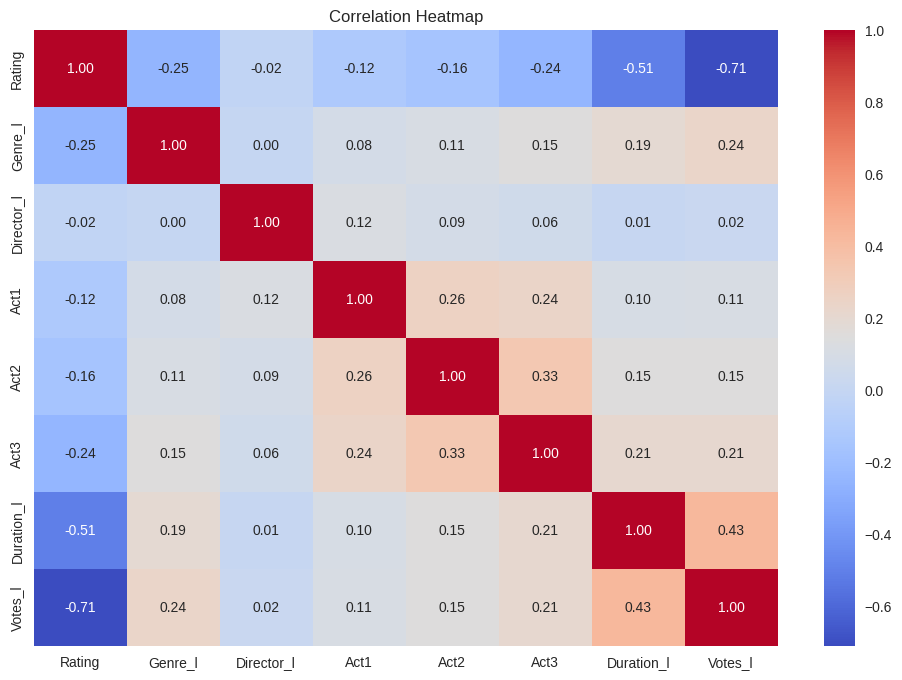

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.isnull().sum()
data.fillna(0)

,Rating,Genre_l,Director_l,Act1,Act2,Act3,Duration_l,Votes_l
0,0,299,1926,2250,800,3108,182,2034
1,7,299,1548,3280,4790,527,9,1849
2,0,351,5123,3713,2866,3450,172,2034
3,4,228,3319,2917,1504,4020,10,1169
4,0,299,385,3112,3462,405,5,2034
...,...,...,...,...,...,...,...,...
15504,4,0,2690,2586,4299,4262,182,368
15505,4,40,2499,227,4532,519,29,1687
15506,0,0,2424,3609,4891,4820,182,2034
15507,0,0,5938,4718,4891,4820,182,2034


In [ ]:
data['Rating'] = data['Rating'].fillna(0).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Rating      15509 non-null  int64
 1   Genre_l     15509 non-null  int64
 2   Director_l  15509 non-null  int64
 3   Act1        15509 non-null  int64
 4   Act2        15509 non-null  int64
 5   Act3        15509 non-null  int64
 6   Duration_l  15509 non-null  int64
 7   Votes_l     15509 non-null  int64
dtypes: int64(8)
memory usage: 969.4 KB


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Genre_l','Director_l','Act1','Act2','Act3','Duration_l','Votes_l']])

In [ ]:
x = pd.DataFrame(scaled_features)
y = data['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse: ",mse)
print("r2 score: ",r2)

mse:  3.591447946397926
r2 score:  0.5603943362419682


In [ ]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred2)
r21 = r2_score(y_test, y_pred2)
print("mse: ",mse2)
print("r2 score: ",r21)

mse:  1.6608639587362992
r2 score:  0.7967045008338911


In [ ]:
best_model = RandomForestRegressor()
best_model.fit(x_train, y_train)
y_predd = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_predd)
r2 = r2_score(y_test, y_predd)
print("mse: ",mse)
print("r2 score: ",r2)

mse:  0.8827285944551904
r2 score:  0.8919509636571876
